1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [ ]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

In [ ]:
N=1000
np.random.seed(N)
x1=np.random.randn(N)
x2=x1+np.random.normal(0,3,N)
x3=2*x1+x2
X=np.stack((x1,x2,x3), axis=1)

#the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov=np.cov(X.T)
l, V = la.eig(cov)
l = np.real_if_close(l)
V=np.real_if_close(V)

#the eigenvectors and eigenvalues using the eigendecomposition of the SVD
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(1000-1)
V_svd = -Vt.T

In [ ]:
# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

Eigendecomposition:
 [ 2.73829291e+01 -2.61055132e-15  2.10580982e+00]
SVD:
 [2.73843081e+01 2.10593823e+00 3.95713377e-31]


In [ ]:
# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

Eigendecomposition:
 [[-0.10859842 -0.81649658  0.56704472]
 [-0.5858867  -0.40824829 -0.70005008]
 [-0.80308353  0.40824829  0.43403937]]
SVD:
 [[-0.10860786 -0.56704291  0.81649658]
 [-0.58587505  0.70005983  0.40824829]
 [-0.80309076 -0.434026   -0.40824829]]


Both methods lead to the same results. It's just that the order is different.

In [ ]:
#What percent of the total dataset's variability is explained by the principal components? 
Lambda = np.diag(l)
for i in range(3):
  print("By selecting the component ",i,", we retain %.2f%% of the total variability" % abs(100*(Lambda[i, i]/Lambda.trace())))

By selecting the component  0 , we retain 92.86% of the total variability
By selecting the component  1 , we retain 0.00% of the total variability
By selecting the component  2 , we retain 7.14% of the total variability


 Given how the dataset was constructed, these results make sense because the second 2 features are mainly constructed with the first feature ( linear combination). And also, the third feature is a linear combination of both the first and the second features.

In [ ]:
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained
New_l=np.array([l[0],l[2]])
New_V=V[:,::2]
New_Lambda=np.diag(New_l)
print("With the new sys, we retain %.2f%% of the total variability" % abs(100*(New_Lambda[0,0]+New_Lambda[1,1])/Lambda.trace()))

With the new sys, we retain 100.00% of the total variability


Text(0.5, 1.0, 'New Basis Data [x1,x2]: ')

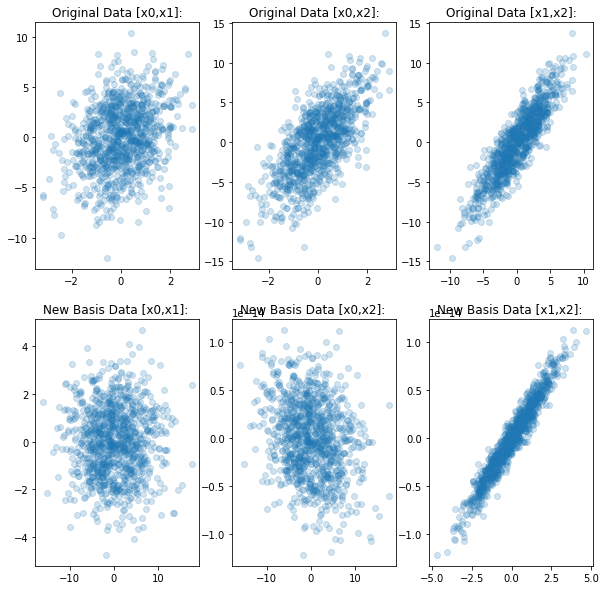

In [ ]:
#Redefine the data according to the new basis from the PCA
idx = l.argsort()[::-1]
l = l[idx]
V = V[:, idx]
Xp = np.dot(V.T, X.T).T
#the  [x0,x1] ,  [x0,x2]  and  [x1,x2]  projections)
#Plot the data, in both the original and the new basis. 
fig, axes = plt.subplots(2,3,figsize=(10,10))

#[x0,x1]
axes[0,0].scatter(X[:,0], X[:,1], alpha=0.2)
axes[0,0].set_title("Original Data [x0,x1]:")

#[x0,x2]
axes[0,1].scatter(X[:,0], X[:,2], alpha=0.2)
axes[0,1].set_title("Original Data [x0,x2]:")

#[x1,x2] 
axes[0,2].scatter(X[:,1], X[:,2], alpha=0.2)
axes[0,2].set_title("Original Data [x1,x2]:")

#Plot the data in the new basis. 
#[x0,x1]
axes[1,0].scatter(Xp[:,0], Xp[:,1], alpha=0.2)
axes[1,0].set_title("New Basis Data [x0,x1]: ")

#[x0,x2]
axes[1,1].scatter(Xp[:,0], Xp[:,2], alpha=0.2)
axes[1,1].set_title("New Basis Data [x0,x2]: ")

#[x1,x2] 
axes[1,2].scatter(Xp[:,1], Xp[:,2], alpha=0.2)
axes[1,2].set_title("New Basis Data [x1,x2]: ")


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [ ]:
#new dataset
N=1000
np.random.seed(N)
x1=np.random.randn(N)
x2=x1+np.random.normal(0,3,N)
x3=2*x1+x2
X=np.stack((x1,x2,x3), axis=1)
x_10=np.random.normal(0,0.2,size=(N,10))
Y=np.hstack((X, x_10))

#Produce PCA for the new dataset
cov=np.cov(Y.T)
l, V = la.eig(cov)
l = np.real_if_close(l)
V=np.real_if_close(V)
idx = l.argsort()[::-1]
l = l[idx]
V = V[:, idx]

#Dataset in the new basis
Yp= np.dot(V.T, Y.T).T

In [ ]:
Lambda = np.diag(l)
for i in range(13):
  print("By selecting the component ",i,", we retain %.2f%% of the total variability" % abs(100*(Lambda[i, i]/Lambda.trace())))

By selecting the component  0 , we retain 91.60% of the total variability
By selecting the component  1 , we retain 7.05% of the total variability
By selecting the component  2 , we retain 0.16% of the total variability
By selecting the component  3 , we retain 0.15% of the total variability
By selecting the component  4 , we retain 0.15% of the total variability
By selecting the component  5 , we retain 0.14% of the total variability
By selecting the component  6 , we retain 0.14% of the total variability
By selecting the component  7 , we retain 0.13% of the total variability
By selecting the component  8 , we retain 0.13% of the total variability
By selecting the component  9 , we retain 0.13% of the total variability
By selecting the component  10 , we retain 0.12% of the total variability
By selecting the component  11 , we retain 0.10% of the total variability
By selecting the component  12 , we retain 0.00% of the total variability


Only two components contribute in the total variablity which is the same as the previous exemple. And this is due to the linear combination in x2 and x3 using x1 and x2 and having no correlation in the rest of the dataset.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 